# 2021 지역별 질병분류코드별 사망자 수

## Setting

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

## DDA

### 1. 연령별 사망률

In [60]:
df_die_21 = pd.read_csv('../csv/2021_전국_질병분류코드별_연령군별_사망자_수.csv')
df_die_21.head()

,질병분류코드 및 질환별(1),질병분류코드 및 질환별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
0,질병분류코드 및 질환별(1),질병분류코드 및 질환별(2),사망자수,<1,1-14,15-24,25-44,45-64,65≤
1,계,소계,1845,34,11,15,65,344,1376
2,희귀질환,소계,1826,30,11,14,65,337,1369
3,희귀질환,A81.0 크로이츠펠트-야콥병,29,0,0,0,0,8,21
4,희귀질환,D59.3 비정형 용혈-요독증후군,4,0,0,0,0,0,4


In [61]:
df_die_21 = df_die_21.rename(columns={ '2021' : '계', '2021.1' : '1세 이하', '2021.2' : '1-14세', '2021.3' : '15-24세', '2021.4' : '25-44세', '2021.5' : '45-65세', '2021.6' : '65세 이상' })

In [62]:
df_die_21 = df_die_21.drop(index=0)

In [63]:
# 극희귀질환 데이터는 필요하지 않다고 판단함 -> 1845명 중 사망자가 19명
# 단, 발생자 수의 데이터를 포함했을 때도 유의미하지 않을 경우 둘 다 삭제

In [64]:
df_die_21.head()

,질병분류코드 및 질환별(1),질병분류코드 및 질환별(2),계,1세 이하,1-14세,15-24세,25-44세,45-65세,65세 이상
1,계,소계,1845,34,11,15,65,344,1376
2,희귀질환,소계,1826,30,11,14,65,337,1369
3,희귀질환,A81.0 크로이츠펠트-야콥병,29,0,0,0,0,8,21
4,희귀질환,D59.3 비정형 용혈-요독증후군,4,0,0,0,0,0,4
5,희귀질환,D59.5 발작성 야간헤모글로빈뇨,2,0,0,0,1,0,1


In [49]:
df_die_21.info() # 값들이 전부 object임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 1 to 157
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   질병분류코드 및 질환별(1)  157 non-null    object
 1   질병분류코드 및 질환별(2)  157 non-null    object
 2   계                157 non-null    object
 3   1세 이하            157 non-null    object
 4   1-14세            157 non-null    object
 5   15-24세           157 non-null    object
 6   25-44세           157 non-null    object
 7   45-65세           157 non-null    object
 8   65세 이상           157 non-null    object
dtypes: object(9)
memory usage: 11.2+ KB


In [52]:
df_die_21_age_all = df_die_21.iloc[1][3:9]
df_die_21_age_all
df_die_21_age_all = df_die_21_age_all.astype(int)

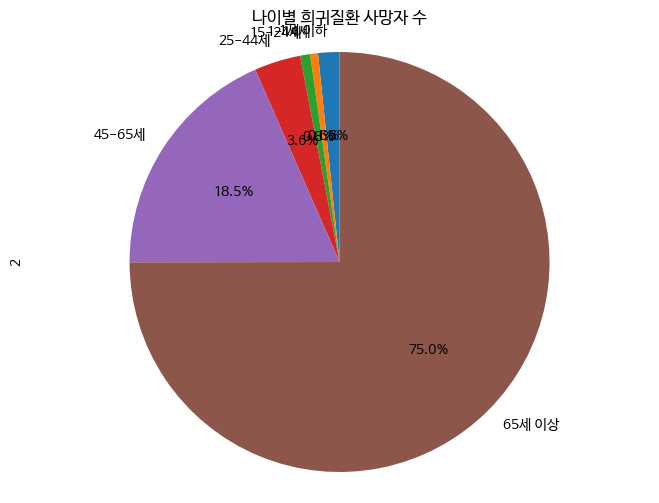

In [53]:
# 파이차트 제작
df_die_21_age_all.plot.pie(figsize=(8,6), autopct='%1.1f%%', startangle=90, title='나이별 희귀질환 사망자 수')
plt.axis('equal')
plt.show()

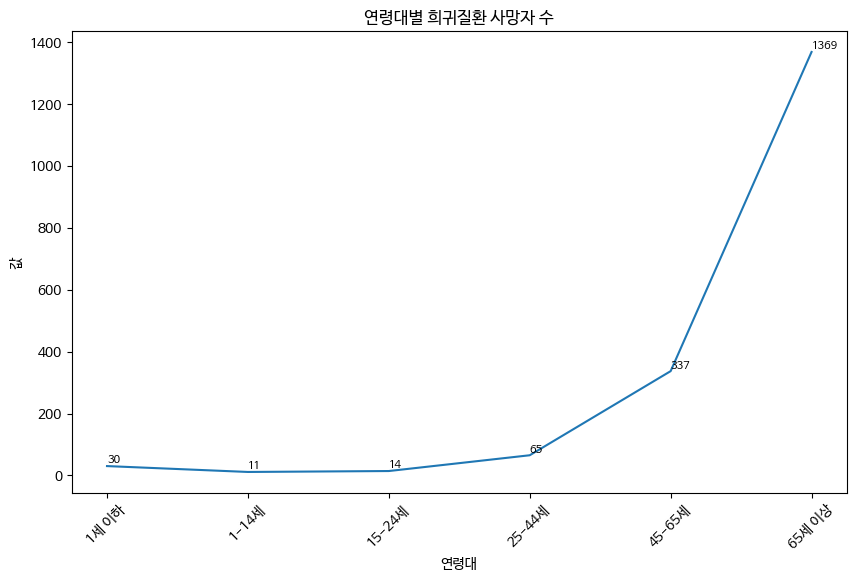

In [54]:
# 선그래프 제작
line_graph = df_die_21_age_all.plot(kind='line', figsize=(10, 6))
for i, j in enumerate(df_die_21_age_all):
    line_graph.text(i, j, str(j), fontsize=8,  verticalalignment='bottom')

plt.xlabel('연령대')
plt.ylabel('값')
plt.title('연령대별 희귀질환 사망자 수')
plt.xticks(range(len(df_die_21_age_all)), rotation=45)
plt.show()

- 연령대별 사망자 수 : 65세 이상 > 45-65새 > 25-44세 > 1세 이하
- 원인이 희귀질환이 아닌 다른 질병일 수 있음을 감안해야 함
- 가설 : 1세 이하에서 버틸 수 있는 병은 나이가 들 때까지도 사망률에 영향을 미치지 않으며 나이가 들 수록 사망률이 높은 이유는 다른 요인이 개입했을 가능성이 있음

### 2. 연령별 사망률에 영향을 미치는 질병

In [65]:
df_die_21 = df_die_21.drop(['질병분류코드 및 질환별(1)'], axis=1)

,질병분류코드 및 질환별(2),계,1세 이하,1-14세,15-24세,25-44세,45-65세,65세 이상
1,소계,1845,34,11,15,65,344,1376
2,소계,1826,30,11,14,65,337,1369
3,A81.0 크로이츠펠트-야콥병,29,0,0,0,0,8,21
4,D59.3 비정형 용혈-요독증후군,4,0,0,0,0,0,4
5,D59.5 발작성 야간헤모글로빈뇨,2,0,0,0,1,0,1


In [66]:
df_die_21 = df_die_21.rename(columns={'질병분류코드 및 질환별(2)' : '질병분류코드 및 질환명'})
df_die_21.head()

,질병분류코드 및 질환명,계,1세 이하,1-14세,15-24세,25-44세,45-65세,65세 이상
1,소계,1845,34,11,15,65,344,1376
2,소계,1826,30,11,14,65,337,1369
3,A81.0 크로이츠펠트-야콥병,29,0,0,0,0,8,21
4,D59.3 비정형 용혈-요독증후군,4,0,0,0,0,0,4
5,D59.5 발작성 야간헤모글로빈뇨,2,0,0,0,1,0,1


In [67]:
df_die_21 = df_die_21[df_die_21['질병분류코드 및 질환명'] != '소계']

In [68]:
df_die_21.head()

,질병분류코드 및 질환명,계,1세 이하,1-14세,15-24세,25-44세,45-65세,65세 이상
3,A81.0 크로이츠펠트-야콥병,29,0,0,0,0,8,21
4,D59.3 비정형 용혈-요독증후군,4,0,0,0,0,0,4
5,D59.5 발작성 야간헤모글로빈뇨,2,0,0,0,1,0,1
6,D60.0 만성 후천성 순수적혈구무형성,4,0,0,0,1,0,3
7,D61.3 특발성 무형성빈혈,22,0,0,0,2,3,17
